## Introduction to convolution Neural Networks (CNN) and Computer vision with TensorFlow

### Get the data
The image we are working with are from the Food101 dataset(101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we have modified it to only use two classes (Pizza & Steak) using the imge data modified notebook

**Note**: We start with a smaller dataset to we can quickly figure what works before scaling up


In [2]:
#Get the data

import zipfile
import wget

filename = wget.download('https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip') 

#unzip the downloaded file
zip_ref=zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

### Inspect the dataset
At the biginning of any ML project inspect the dataset.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [5]:
import os

#Walk through pizza_steak directory and list number of file

for dirpath, dirname, filename in os.walk("pizza_steak"):
    print(f"There are  {len(dirname)} directories and {len(filename)} images in '{dirpath}'")

There are  2 directories and 0 images in 'pizza_steak'
There are  2 directories and 0 images in 'pizza_steak/test'
There are  0 directories and 250 images in 'pizza_steak/test/steak'
There are  0 directories and 250 images in 'pizza_steak/test/pizza'
There are  2 directories and 0 images in 'pizza_steak/train'
There are  0 directories and 750 images in 'pizza_steak/train/steak'
There are  0 directories and 750 images in 'pizza_steak/train/pizza'


In [6]:
# Another way to find out how many images are in a file

num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

### To Visualize our image, first let's get the class name programmatically

In [8]:
# Get the classnames programmatically

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_name from the subdirectory
print(class_name)

['pizza' 'steak']


In [9]:
#Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #Setup the target directory (We'll view images from there)
    target_folder = target_dir+target_class

    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    #Read in the image as plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


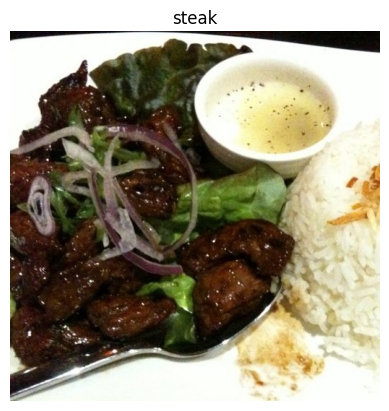

In [15]:
#View a random iamge from training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [17]:
import tensorflow as tf
tf.constant(img) #converted in tensor

2024-03-07 22:18:14.882756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 16,  15,  13],
        [ 11,  10,   8],
        [ 11,  10,   8],
        ...,
        [ 11,  12,   7],
        [ 10,  11,   6],
        [  8,   9,   4]],

       [[ 16,  15,  13],
        [ 13,  12,  10],
        [ 14,  13,  11],
        ...,
        [  9,  10,   5],
        [  8,   9,   4],
        [  7,   8,   3]],

       [[  4,   3,   1],
        [  3,   2,   0],
        [  6,   5,   3],
        ...,
        [  8,   7,   3],
        [  7,   6,   2],
        [  7,   6,   2]],

       ...,

       [[210, 216, 206],
        [204, 210, 198],
        [197, 203, 191],
        ...,
        [253, 255, 252],
        [253, 255, 252],
        [253, 255, 252]],

       [[184, 192, 179],
        [183, 191, 178],
        [182, 190, 175],
        ...,
        [253, 255, 252],
        [253, 255, 252],
        [253, 255, 252]],

       [[172, 180, 167],
        [157, 165, 150],
        [142, 150, 135],
        ...,
        [253, 255, 25

In [18]:
#View the image shape

img.shape #Return width, height, color channels

(512, 512, 3)

In [20]:
#Get the all the pixel values between 0 & 1 
# Normalizing the data

img/255.  #Manually, divided with 255, because 255 is maximum value for the pixel

array([[[0.0627451 , 0.05882353, 0.05098039],
        [0.04313725, 0.03921569, 0.03137255],
        [0.04313725, 0.03921569, 0.03137255],
        ...,
        [0.04313725, 0.04705882, 0.02745098],
        [0.03921569, 0.04313725, 0.02352941],
        [0.03137255, 0.03529412, 0.01568627]],

       [[0.0627451 , 0.05882353, 0.05098039],
        [0.05098039, 0.04705882, 0.03921569],
        [0.05490196, 0.05098039, 0.04313725],
        ...,
        [0.03529412, 0.03921569, 0.01960784],
        [0.03137255, 0.03529412, 0.01568627],
        [0.02745098, 0.03137255, 0.01176471]],

       [[0.01568627, 0.01176471, 0.00392157],
        [0.01176471, 0.00784314, 0.        ],
        [0.02352941, 0.01960784, 0.01176471],
        ...,
        [0.03137255, 0.02745098, 0.01176471],
        [0.02745098, 0.02352941, 0.00784314],
        [0.02745098, 0.02352941, 0.00784314]],

       ...,

       [[0.82352941, 0.84705882, 0.80784314],
        [0.8       , 0.82352941, 0.77647059],
        [0.77254902, 0

## An end-to-end example

Build a convolution neural network to find pattern in our image, more specifically we need a way to 

* Load our image
* Preprocess out image
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

# Preprocessing daa (get all of the pixel values between 0 and 1, also called the normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Set paths to our dta directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                                class_mode="binary",
                                                seed=42
                                               )


#Build CNN model (Same as the Tiny VGG on the CNN website)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.5598 - accuracy: 0.7060 - val_loss: 0.4213 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.4293 - accuracy: 0.7980 - val_loss: 0.3432 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 39s 820ms/step - loss: 0.4298 - accuracy: 0.8227 - val_loss: 0.3412 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 39s 820ms/step - loss: 0.3788 - accuracy: 0.8413 - val_loss: 0.3167 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 40s 842ms/step - loss: 0.3134 - accuracy: 0.8787 - val_loss: 0.3213 - val_accuracy: 0.8680
